In [1]:
!pip install scikit-learn

In [9]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

# pip install tensorflow
import tensorflow as tf
import keras
from keras import layers

In [10]:
df = pd.read_csv("/content/drive/MyDrive/Advancing Machine Learning/exercise_1/preprocessed/processed_regression.csv")

In [11]:
num_samples_to_select = 3000

if len(df) > num_samples_to_select:
    df = df.sample(n=num_samples_to_select, random_state=42).reset_index(drop=True)
    print(f"Dataset reduced to {num_samples_to_select} samples.")
else:
    print(f"Dataset has {len(df)} samples, which is less than or equal to the requested {num_samples_to_select}. Using all available samples.")

df.tail()

Dataset reduced to 3000 samples.


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
2995,32,88,0,1,1,7,83,1,1,1,1,2,0,0,4,0,2,0,1,73
2996,19,84,1,0,1,8,56,0,1,0,1,0,0,2,3,1,0,0,1,64
2997,18,72,0,0,0,8,71,1,1,2,2,0,1,0,4,0,2,0,1,66
2998,10,85,0,0,1,6,64,1,1,1,0,0,1,1,3,0,1,0,1,64
2999,27,72,0,2,0,5,93,1,1,1,2,0,1,0,2,0,1,0,1,70


In [12]:
df.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

In [13]:
X = df[['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender']]

# have only the target variable here (dependent variable)
y = df['Exam_Score']

In [14]:
# a nice trick to get all 6 variables for our neural network
# first split 70% for training data, and save the last 30% for temporary variables
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=101)

# then split again the temporary variables by 50% (so if it was 30% originally => now it's
# 15%/15% (because 30% * 50% = 15%))

# so after this, we have 70% for training, 15% testing, and 15% validation
# => 100% in total
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=101)

In [15]:
# 19 variables in this case for training
training_variable_amount = len(X.columns)

# NOTE! This neural network was copied from first example,
# PROBABLY NOT A GOOD SOLUTION FOR THIS DATA

# create the structure of our neural network
model = keras.Sequential(
    [
        layers.Dense(12, activation="relu", input_shape=(training_variable_amount,)),
        layers.Dense(8, activation="relu"),
        layers.Dense(1)
    ]
)

# compile the neural network, use adam (most common one) as the optimizer
# and mean square error (mse) for the loss function (most common for regression problems)
model.compile(optimizer='adam', loss='mse')

# show a quick recap of our structure
model.summary()

# start training
model.fit(x=X_train, y=y_train, epochs=1500, validation_data=(X_val, y_val))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 12)             │           240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 353 (1.38 KB)

 Trainable params: 353 (1.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/1500
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 4681.8047 - val_loss: 1663.7542
Epoch 2/1500
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 903.5147 - val_loss: 68.0165
Epoch 3/1500
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 60.8592 - val_loss: 49.2575
Epoch 4/1500
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 48.1438 - val_loss: 41.6804
Epoch 5/1500
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 38.3866 - val_loss: 27.2673
Epoch 6/1500
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 26.4919 - val_loss: 20.0928
Epoch 7/1500
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 21.5249 - val_loss: 17.3077
Epoch 8/1500
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 18.2649 - val_loss: 15.6901
Epoch 9/1500
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 16.7719 - val_loss: 14.6643
Epoch 10/1500
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 15.9624 - val_loss: 14.0388
Epoch 11/1500
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 15.5004 - val_loss: 13.6542
Epoch 12/1500
66/66 ━━━━

<Axes: >

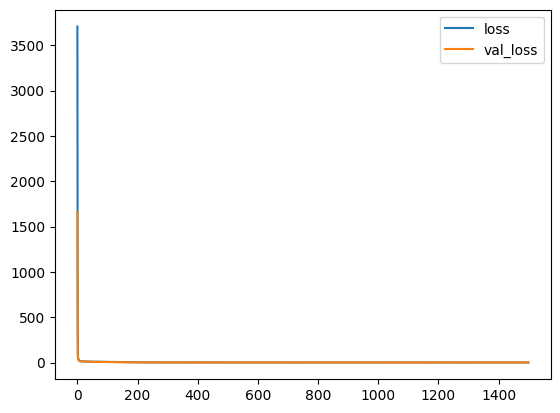

In [17]:
# let's see if our models overfits
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [18]:
# these should be as relatively close to each other as possible
# in this case, ~4600 to 4450 is quite close
print("Test data evaluation:")
print(model.evaluate(X_test, y_test, verbose=0))
print("\nTrain data evaluation:")
print(model.evaluate(X_train, y_train, verbose=0))

Test data evaluation:
0.8067851662635803

Train data evaluation:
0.8604370355606079


In [19]:
# we need to calculate test predictions based on the TEST DATA SET
# for metrics that follow
test_predictions = model.predict(X_test)

# reshape the data for easier comparison table
test_predictions = pd.Series(test_predictions.reshape(len(y_test),))
pred_df = pd.DataFrame(np.asarray(y_test), columns=['Test True Y'])
pred_df = pd.concat([pred_df, test_predictions], axis=1)
pred_df.columns = ['Test True Y', 'Model Predictions']

# print the comparison table - true values vs. model predicted values
# we can nicely see here how far off our model is in some cases
pred_df

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


,Test True Y,Model Predictions
0,67,66.416519
1,69,67.833405
2,64,62.947571
3,61,61.681408
4,62,61.654320
...,...,...
445,64,65.065842
446,65,65.594269
447,68,68.201950
448,63,63.702351


<Axes: xlabel='Test True Y', ylabel='Model Predictions'>

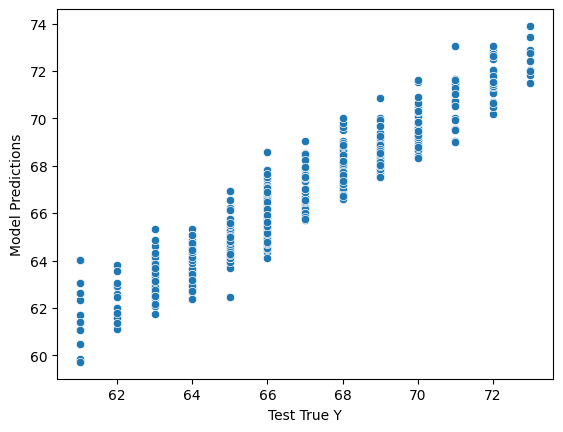

In [20]:
 # compare the predictions to real values
# if these follow a diagonal line => they correlate well
sns.scatterplot(x='Test True Y', y='Model Predictions', data=pred_df)

In [21]:
# MAE - Mean average error
print("MAE")
print(round(metrics.mean_absolute_error(y_test, test_predictions), 2), "$")

# MSE - Mean square error
print("\nMSE")
print(round(metrics.mean_squared_error(y_test, test_predictions), 2), "$^2")

# RMSE - Root mean square error
print('\nRMSE:')
print(round(np.sqrt(metrics.mean_squared_error(y_test, test_predictions)), 2), "$")

# R-squared. 0 = the model descibes the dataset poorly
# 1 = model describes the dataset perfectly
print('\nR-squared:')
print(round(metrics.r2_score(y_test, test_predictions), 2))

# Explained Variance Score => 0 = the model descibes the dataset poorly
# 1 = model describes the dataset perfectly
# high variance score = model is a good fit for the data
# low variance score = model is not a good fit for the data
# the higher the score, the model is more able to explain the variation in the data
# if score is low, we might need more and better data
print("\nExplained variance score:")
print(round(metrics.explained_variance_score(y_test, test_predictions), 2))

MAE
0.74 $

MSE
0.81 $^2

RMSE:
0.9 $

R-squared:
0.9

Explained variance score:
0.9


/tmp/ipython-input-1775748582.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - test_predictions))


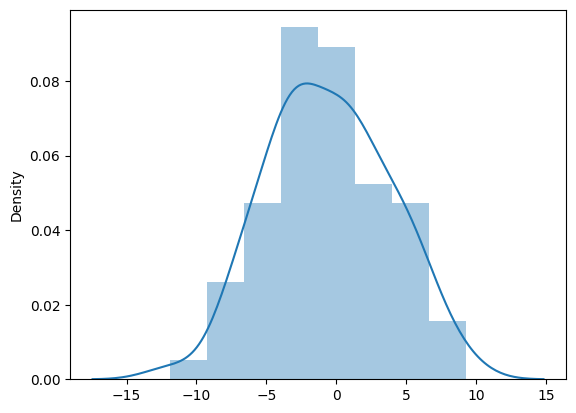

In [22]:
# residual histogram, does our model also follow
# a normal distribution
sns.distplot((y_test - test_predictions))
plt.show()
plt.close()

In [23]:
# Example new row for prediction (using your dataset)
tester_row = {
    "Hours_Studied": 25,
    "Attendance": 69,
    "Parental_Involvement": 2,
    "Access_to_Resources": 0,
    "Extracurricular_Activities": 0,
    "Sleep_Hours": 7,
    "Previous_Scores": 76,
    "Motivation_Level": 0,
    "Internet_Access": 1,
    "Tutoring_Sessions": 1,
    "Family_Income": 2,
    "Teacher_Quality": 0,
    "School_Type": 1,
    "Peer_Influence": 0,
    "Physical_Activity": 2,
    "Learning_Disabilities": 0,
    "Parental_Education_Level": 0,
    "Distance_from_Home": 0,
    "Gender": 0
}



# Convert the new data to pandas DataFrame
tester_row = pd.DataFrame([tester_row])

In [24]:
result = model.predict(tester_row)[0]

print()
print(f"Estimated score for that student is :")
print(f"{round(float(result), 2)}")
print("----------------")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step

Estimated score for that student is :
66.14
----------------


/tmp/ipython-input-4294863125.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"{round(float(result), 2)}")
